# Categorical Variable Analysis
## In this section, I will explain some special functions and tricks to do categorical variable analysis.

Follow the steps:
1. Let's add the necessary libraries and run our work through them.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
titanic = sns.load_dataset("titanic")
df = titanic.copy()
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

2. Some list comprehnsions to distinguish categorical variables, categorical variables appearing in numeric variable type, and categorical variables but cardinal variables

In [ ]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category","object","bool"]]
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int","float"]]
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and df[col].dtypes in ["category","object"]]
all_cat_cols = cat_cols + num_but_cat
all_cat_cols = [col for col in all_cat_cols if col not in cat_but_car]
print("Categorical Columns: ",cat_cols)
print("Numeric But Categorical Columns: ",num_but_cat)
print("Categorical But Cardinal: ", cat_but_car)
print("All Categorical Columns: ",all_cat_cols)

Categorical Columns:  ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
Numeric But Categorical Columns:  ['survived', 'pclass', 'sibsp', 'parch']
Categorical But Cardinal:  []
All Categorical Columns:  ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone', 'survived', 'pclass', 'sibsp', 'parch']


3. By using the list comprehensions we wrote in the third step in a function, we get information about the categorical variables of the data over the entire data set.

        sex     Ration
male    577  64.758698
female  314  35.241302
##########################################


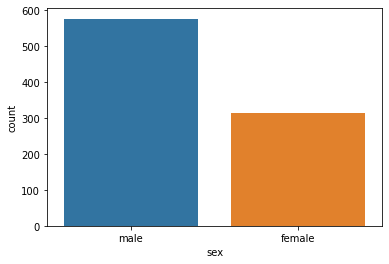

In [ ]:
def cat_summary(dataframe,col_name,plot=False):
  print(pd.DataFrame({col_name:dataframe[col_name].value_counts(),
                      'Ration': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##########################################")
  if plot:
    sns.countplot(x=dataframe[col_name],data=dataframe);
    plt.show(block=True)


cat_summary(df,"sex",plot=True)

        sex     Ration
male    577  64.758698
female  314  35.241302
##########################################


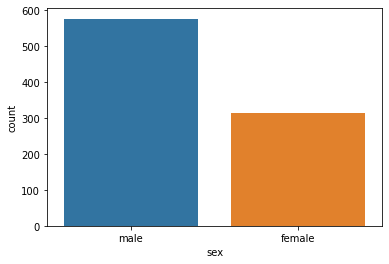

   embarked     Ration
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################


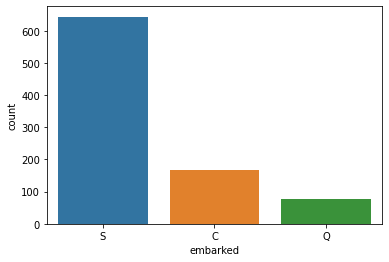

        class     Ration
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################


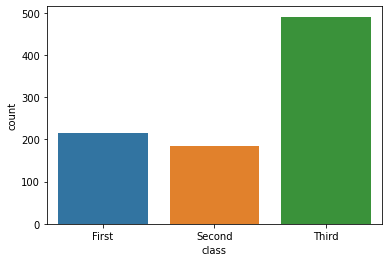

       who     Ration
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################


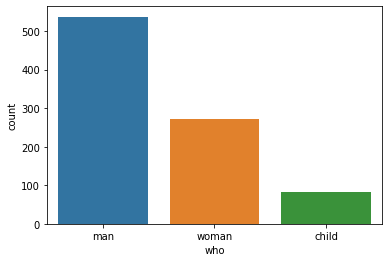

   adult_male    Ration
1         537  60.26936
0         354  39.73064
##########################################


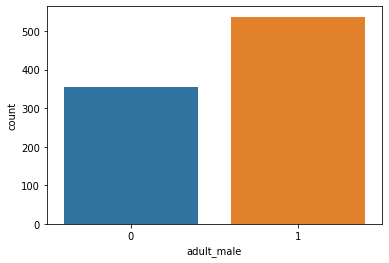

   deck    Ration
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##########################################


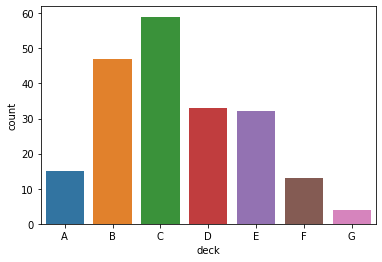

             embark_town     Ration
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##########################################


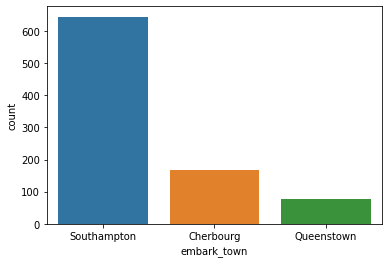

     alive     Ration
no     549  61.616162
yes    342  38.383838
##########################################


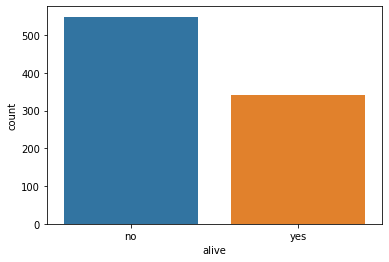

   alone    Ration
1    537  60.26936
0    354  39.73064
##########################################


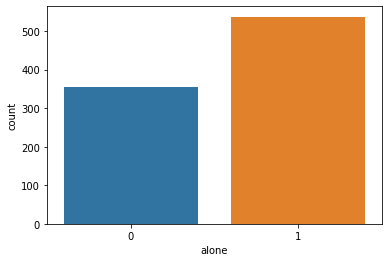

   survived     Ration
0       549  61.616162
1       342  38.383838
##########################################


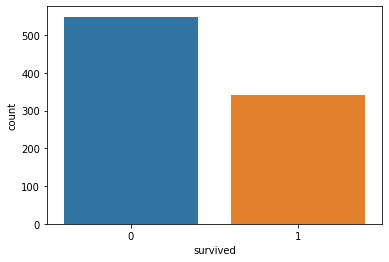

   pclass     Ration
3     491  55.106622
1     216  24.242424
2     184  20.650954
##########################################


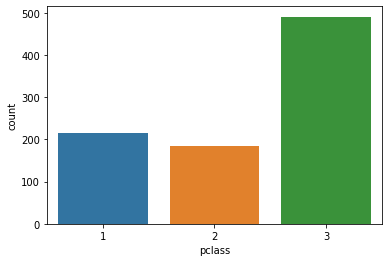

   sibsp     Ration
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
##########################################


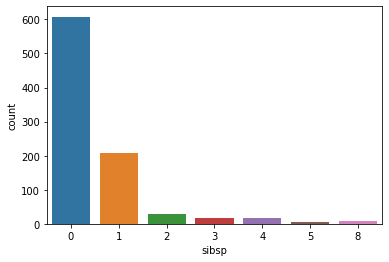

   parch     Ration
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
##########################################


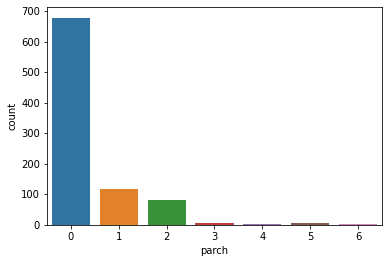

In [ ]:
for col in all_cat_cols:
  if df[col].dtypes == "bool":
    df[col] = df[col].astype(int)
    cat_summary(df,col,plot=True)
  else:
    cat_summary(df,col,plot=True)